# Libraries and Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import geom

In [ ]:
raw_data = pd.read_csv('drive/MyDrive/datasets/Investing/VN30.csv')

In [ ]:
raw_data.shape
raw_data.head(5)

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
0,04/03/2022,"1,525.34","1,525.23","1,529.93","1,519.97",220.07K,0.19%
1,03/03/2022,"1,522.49","1,507.53","1,522.49","1,502.41",244.08K,1.59%
2,02/03/2022,"1,498.61","1,516.31","1,517.49","1,495.16",291.45K,-1.42%
3,01/03/2022,"1,520.12","1,521.44","1,525.00","1,515.49",187.03K,0.19%
4,28/02/2022,"1,517.18","1,525.58","1,533.32","1,512.45",193.57K,-0.61%


# Started

In [ ]:
n = len(raw_data)
closed_value = np.array(raw_data)[:, 1]
change_rate = np.array(raw_data)[:, 6]
up_or_down = np.zeros((n, 1))

for i in range(n):

    closed_value[i] = float(closed_value[i].replace(',', ''))
    change_rate[i] = float(change_rate[i].replace('%', ''))
    if change_rate[i] > 0:
        up_or_down[i] = 1
    else:
        up_or_down[i] = 0

In [ ]:
a = 1
days = 1
all_waited_days = np.zeros((n, 1)) # with zeros
waited_days = [] # without zeros
reversal = np.zeros((n, 1))

for i in range(n):

    if up_or_down[i] == a:
        days = days + 1
    if up_or_down[i] != a:
        all_waited_days[i] = days
        a = up_or_down[i]
        days = 1

all_waited_days = all_waited_days + 1

for i in range(n):
    if change_rate[i] < 0:
        all_waited_days[i] = 0
    if all_waited_days[i] != 0:
        waited_days.append(all_waited_days[i][0])
        reversal[i] = 1
    else:
        pass

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
pd.DataFrame(np.c_[change_rate, up_or_down, all_waited_days, reversal], columns = ['change_rate', 'up_or_down', 'all_waited_days', 'reversal']).head(35)

,change_rate,up_or_down,all_waited_days,reversal
0,0.19,1.0,1.0,1.0
1,1.59,1.0,1.0,1.0
2,-1.42,0.0,0.0,0.0
3,0.19,1.0,2.0,1.0
4,-0.61,0.0,0.0,0.0
5,0.29,1.0,2.0,1.0
6,-1.09,0.0,0.0,0.0
7,0.42,1.0,2.0,1.0
8,-0.07,0.0,0.0,0.0
9,0.13,1.0,2.0,1.0


In [ ]:
unique_waited_days, observed_frequency = np.unique(waited_days, return_counts = True)
prop_unique_waited_days = observed_frequency/len(waited_days)

unique_waited_days = unique_waited_days.astype(int)
sum(observed_frequency)

1786

In [ ]:
observed_frequency

array([1004,  393,  204,  100,   41,   24,   12,    5,    1,    1,    1])

In [ ]:
unique_waited_days

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

<BarContainer object of 11 artists>

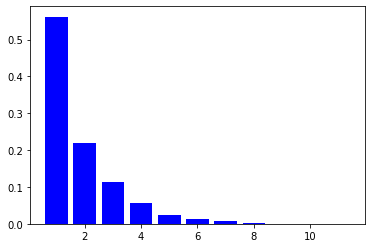

In [ ]:
plt.bar(unique_waited_days, prop_unique_waited_days, color = 'blue')

# Cheking and hypothesis testing

<BarContainer object of 11 artists>

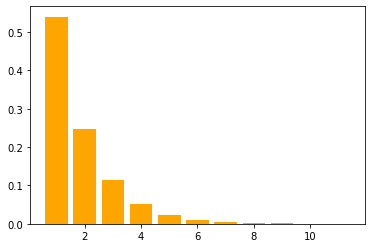

In [ ]:
p = sum(up_or_down)/n
geom_prop = np.empty((len(unique_waited_days)))
for k in range(len(unique_waited_days)):
    geom_prop[k] = (1 - p)**k * p

plt.bar(unique_waited_days, geom_prop, color = 'orange')

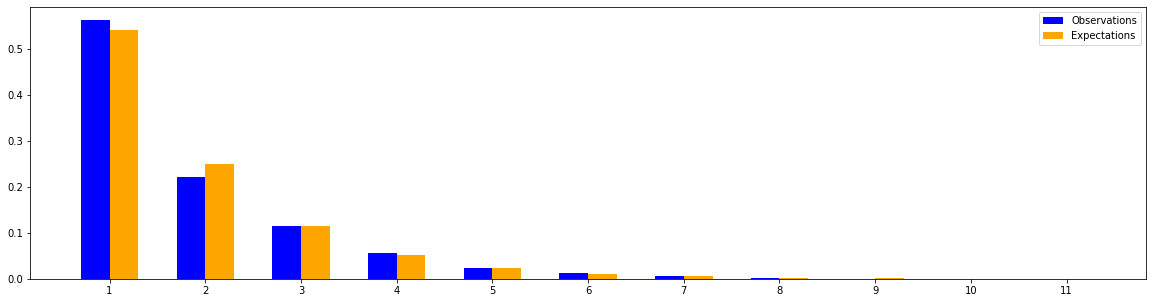

In [ ]:
plt.figure(figsize = (20, 5))

width = 0.3
plt.bar(unique_waited_days, prop_unique_waited_days, width = width, label = 'Observations', color = 'blue')
plt.bar(unique_waited_days + width, geom_prop, width = width, label = 'Expectations', color = 'orange')

plt.xticks(unique_waited_days + width/2, unique_waited_days);
plt.legend(loc = 'best');

In [ ]:
geom_frequency = np.round(geom_prop * sum(observed_frequency)).astype(int)

pd.DataFrame(np.c_[observed_frequency, geom_frequency].T, 
             index = ['observations', 'expectations'], columns = unique_waited_days.astype(int))

,1,2,3,4,5,6,7,8,9,10,11
observations,1004,393,204,100,41,24,12,5,1,1,1
expectations,965,444,204,94,43,20,9,4,2,1,0


In [ ]:
observations = observed_frequency.copy()
expectations = geom_frequency.copy()

num_less_than_5_cases = max(sum(observed_frequency < 5), sum(geom_frequency < 5))
num_less_than_5_cases = num_less_than_5_cases

observations[-num_less_than_5_cases] = sum(observed_frequency[-num_less_than_5_cases:])
expectations[-num_less_than_5_cases] = sum(geom_frequency[-num_less_than_5_cases:])

observations = observations[:-num_less_than_5_cases+1]
expectations = expectations[:-num_less_than_5_cases+1]

pd.DataFrame(np.c_[observations, expectations].T, 
             index = ['observations', 'expectations'], columns = [i+1 for i in range(len(observations))])

,1,2,3,4,5,6,7,8
observations,1004,393,204,100,41,24,12,8
expectations,965,444,204,94,43,20,9,7


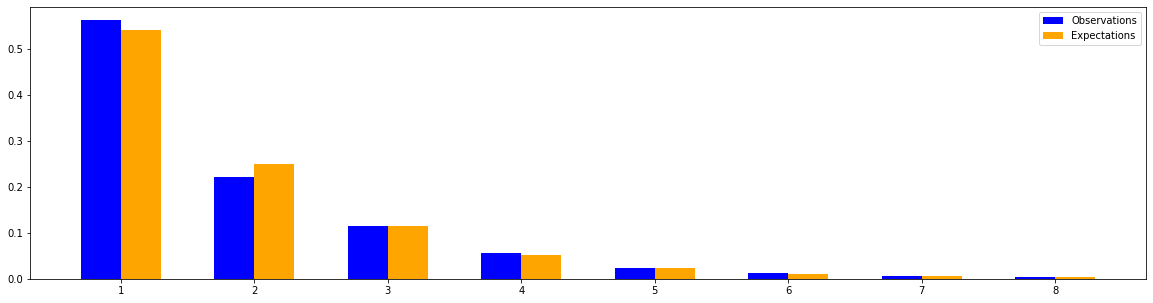

In [ ]:
plt.figure(figsize = (20, 5))

width = 0.3
plt.bar([i+1 for i in range(len(observations))], observations/sum(observations), width = width, label = 'Observations', color = 'blue')
plt.bar([i+1 + width for i in range(len(expectations))], expectations/sum(expectations), width = width, label = 'Expectations', color = 'orange')

plt.xticks([i+1+ width/2 for i in range(len(observations))] , [i+1 for i in range(len(observations))]);
plt.legend(loc = 'best');

Here is the code for calculating chi square valu and p value in R. (I'm not sure why it gives me a different result in Python 😰 )

```
observations <- c(1004, 393, 204, 100, 41, 24, 12, 8)
expectations <- c(965, 444, 204,  94,  43,  20, 9, 7)

chi2 = sum((observations - expectations)**2 / expectations)

pchisq(chi2, df = length(observations) - 1, lower.tail = FALSE)
```

And this results in 0.197 for p-value


# Using 4 groups

In [ ]:
geom_frequency = np.round(geom_prop * sum(observed_frequency)).astype(int)

pd.DataFrame(np.c_[observed_frequency, geom_frequency].T, 
             index = ['observations', 'expectations'], columns = unique_waited_days.astype(int))

,1,2,3,4,5,6,7,8,9,10,11
observations,1004,393,204,100,41,24,12,5,1,1,1
expectations,965,444,204,94,43,20,9,4,2,1,0


In [ ]:
observations = observed_frequency.copy()
expectations = geom_frequency.copy()

num_less_than_5_cases = max(sum(observed_frequency < 5), sum(geom_frequency < 5))
num_less_than_5_cases = 8

observations[-num_less_than_5_cases] = sum(observed_frequency[-num_less_than_5_cases:])
expectations[-num_less_than_5_cases] = sum(geom_frequency[-num_less_than_5_cases:])

observations = observations[:-num_less_than_5_cases+1]
expectations = expectations[:-num_less_than_5_cases+1]

pd.DataFrame(np.c_[observations, expectations].T, 
             index = ['observations', 'expectations'], columns = [i+1 for i in range(len(observations))])

,1,2,3,4
observations,1004,393,204,185
expectations,965,444,204,173


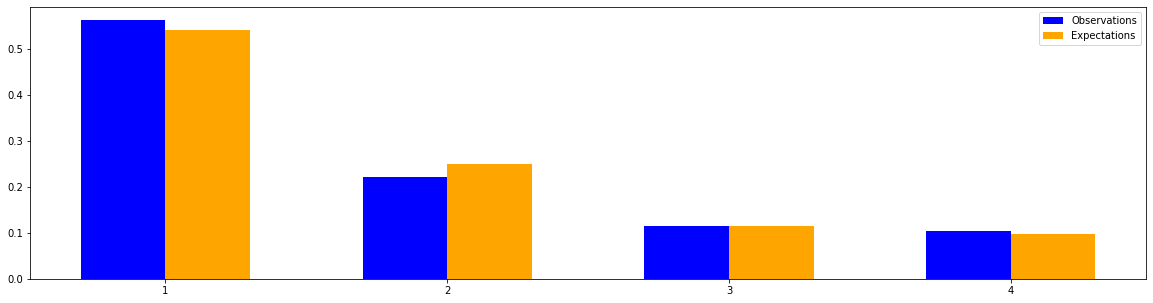

In [ ]:
plt.figure(figsize = (20, 5))

width = 0.3
plt.bar([i+1 for i in range(len(observations))], observations/sum(observations), width = width, label = 'Observations', color = 'blue')
plt.bar([i+1 + width for i in range(len(expectations))], expectations/sum(expectations), width = width, label = 'Expectations', color = 'orange')

plt.xticks([i+1+ width/2 for i in range(len(observations))] , [i+1 for i in range(len(observations))]);
plt.legend(loc = 'best');

Here is the code for calculating chi square valu and p value in R. (I'm not sure why it gives me a different result in Python 😰 )

```
observations <- c(1004, 393, 204, 185)
expectations <- c(965, 444, 204, 173)

chi2 = sum((observations - expectations)**2 / expectations)

pchisq(chi2, df = length(observations) - 1, lower.tail = FALSE)
```

And this results in 0.04 for p-value


# Draft

In [ ]:
n = len(raw_data)
closed_value = np.array(raw_data)[:, 1]
change_rate = np.array(raw_data)[:, 6]
up_or_down = np.zeros((n, 1))

for i in range(n):

    closed_value[i] = float(closed_value[i].replace(',', ''))
    change_rate[i] = float(change_rate[i].replace('%', ''))
    if change_rate[i] > 0:
        up_or_down[i] = 1
    else:
        up_or_down[i] = 0

In [ ]:
a = 1
days = 1
all_waited_days = np.zeros((n, 1)) # with zeros
waited_days = [] # without zeros
reversal = np.zeros((n, 1))

for i in range(n):

    if up_or_down[i] == a:
        days = days + 1
    if up_or_down[i] != a:
        all_waited_days[i] = days
        a = up_or_down[i]
        days = 1

all_waited_days = all_waited_days + 1

for i in range(n):
    if change_rate[i] < 0:
        all_waited_days[i] = 0
    if all_waited_days[i] != 0:
        waited_days.append(all_waited_days[i][0])
        reversal[i] = 1
    else:
        pass

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
pd.DataFrame(np.c_[change_rate, up_or_down, all_waited_days, reversal], columns = ['change_rate', 'up_or_down', 'all_waited_days', 'reversal']).head(35)

,change_rate,up_or_down,all_waited_days,reversal
0,0.19,1.0,1.0,1.0
1,1.59,1.0,1.0,1.0
2,-1.42,0.0,0.0,0.0
3,0.19,1.0,2.0,1.0
4,-0.61,0.0,0.0,0.0
5,0.29,1.0,2.0,1.0
6,-1.09,0.0,0.0,0.0
7,0.42,1.0,2.0,1.0
8,-0.07,0.0,0.0,0.0
9,0.13,1.0,2.0,1.0


In [ ]:
unique_waited_days, observed_frequency = np.unique(waited_days, return_counts = True)
prop_unique_waited_days = observed_frequency/len(waited_days)

<BarContainer object of 11 artists>

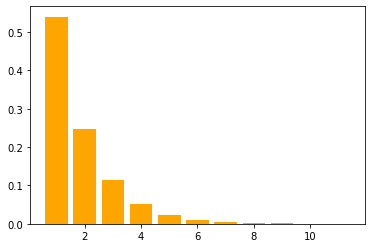

In [ ]:
p = sum(up_or_down)/n
geom_prop = np.empty((len(unique_waited_days)))
for k in range(len(unique_waited_days)):
    geom_prop[k] = (1 - p)**k * p

plt.bar(unique_waited_days, geom_prop, color = 'orange')

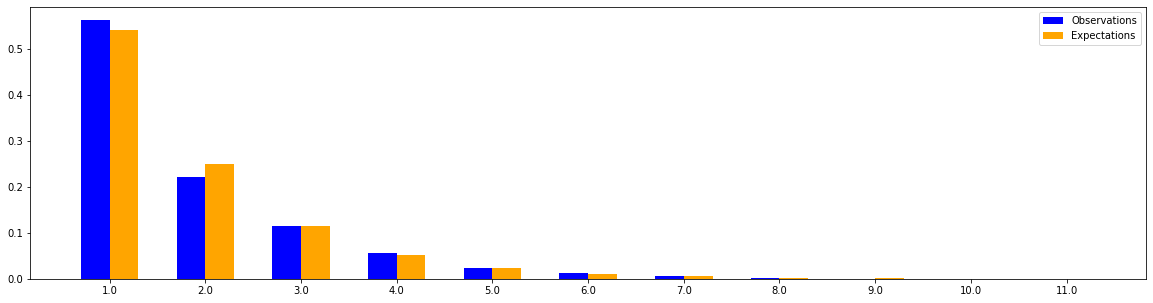

In [ ]:
plt.figure(figsize = (20, 5))

width = 0.3
plt.bar(unique_waited_days, prop_unique_waited_days, width = width, label = 'Observations', color = 'blue')
plt.bar(unique_waited_days + width, geom_prop, width = width, label = 'Expectations', color = 'orange')

plt.xticks(unique_waited_days + width/2, unique_waited_days);
plt.legend(loc = 'best');

In [ ]:
geom_frequency = np.round(geom_prop * sum(observed_frequency)).astype(int)
geom_frequency

array([965, 444, 204,  94,  43,  20,   9,   4,   2,   1,   0])

In [ ]:
observed_frequency

array([1004,  393,  204,  100,   41,   24,   12,    5,    1,    1,    1])

In [ ]:
num_less_than_5_cases = max(sum(observed_frequency < 5), sum(geom_frequency < 5))
num_less_than_5_cases = 7

In [ ]:
obervations = observed_frequency.copy()
expectations = geom_frequency.copy()

obervations[-num_less_than_5_cases] = sum(observed_frequency[-num_less_than_5_cases:])
expectations[-num_less_than_5_cases] = sum(geom_frequency[-num_less_than_5_cases:])

obervations = obervations[:-num_less_than_5_cases+1]
expectations = expectations[:-num_less_than_5_cases+1]

In [ ]:
list(obervations)

[1004, 393, 204, 100, 85]

In [ ]:
expectations

array([736, 388, 204, 107,  57,  62])

In [ ]:
from scipy.stats import chisquare
chisquare(list(expectations), list(obervations))

Power_divergenceResult(statistic=1.4506291794942978, pvalue=0.6937110474635797)

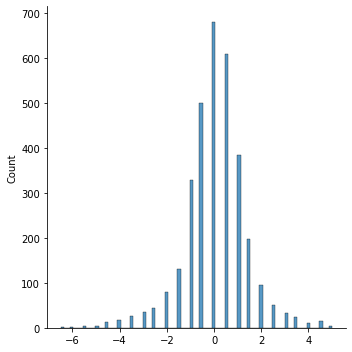

In [ ]:
rounded_change_rate = np.round(list(change_rate * 2)) / 2
np.unique(rounded_change_rate, return_counts = True)
sns.displot(rounded_change_rate)

In [ ]:
years = np.array(raw_data)[:, 0]

for i in range(n):
    years[i] = int(years[i][-4:])


In [ ]:
a = np.c_[years, rounded_change_rate]

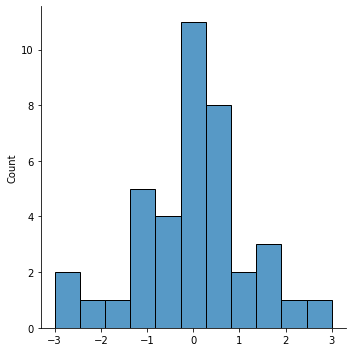

In [ ]:
mask = (a[:, 0] == 2022)
#a[mask]
sns.displot(a[mask][:, 1])

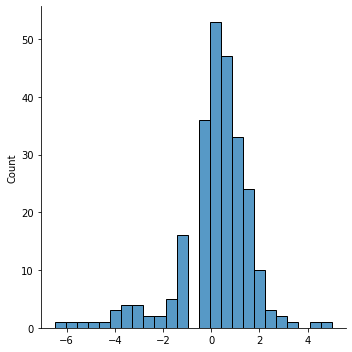

In [ ]:
sns.displot(a[mask][:, 1])